# 一起来打怪之 Credit Scoring 练习

---
## 作业说明

- 答题步骤：
    - 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
    - 请养成代码注释的好习惯

- 解题思路：
    - 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
    - 解题思路**仅供参考**，鼓励原创解题方法
    - 为督促同学们自己思考，解题思路内容设置为**白色**，必要时请从冒号后拖动鼠标查看

- 所用数据
    - 请注意导入数据库后先**查看和了解数据的基本性质**，后面的问题不再一一提醒

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


----------
## Read the data into Pandas 

In [1]:
import pandas as pd #导入pandas
pd.set_option('display.max_columns', 500) # 设置显示最大行数
import zipfile #读入数据，并显示抬头
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
data.shape

(112915, 11)

------------
## Drop na

In [3]:
data.isnull().sum(axis=0)    # 这一步是去掉异常值

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
data.dropna(inplace=True)  #去掉异常值
data.shape

(108648, 11)

---------
## Create X and y

In [5]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [6]:
y.mean()

0.06742876076872101

---
## 练习1：把数据切分成训练集和测试集
- 提示：<span style='color:white'>from sklearn.model_selection import train_test_split('Gender') </span>

In [7]:
## your code here 这里面0.3表示，30%的数据是测试集，剩下的是训练集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76053, 10), (32595, 10), (76053,), (32595,))

----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类
尝试查sklearn API了解模型参数含义，调整不同的参数

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # 对数据的每一列做了一个归一化,也就是标准化，是数据变成一个均值为0的数据集
sc.fit(X_train)        # 方便收敛

StandardScaler()

In [9]:
sc.mean_

array([6.24891681e+00, 5.13431291e+01, 3.82141401e-01, 3.05889733e-01,
       6.96329249e+03, 8.67997318e+00, 2.15875771e-01, 1.01193904e+00,
       1.91761009e-01, 8.57415224e-01])

In [10]:
sc.scale_

array([2.73361312e+02, 1.44369533e+01, 3.57454381e+00, 2.22787954e-01,
       1.58054741e+04, 5.12814227e+00, 3.54201626e+00, 1.07201391e+00,
       3.52622942e+00, 1.15264795e+00])

In [11]:
# 标准化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
# check 结果：
import numpy as np
np.mean(X_train, axis=0), np.std(X_train, axis=0)


(RevolvingUtilizationOfUnsecuredLines       6.248917
 age                                       51.343129
 NumberOfTime30-59DaysPastDueNotWorse       0.382141
 DebtRatio                                  0.305890
 MonthlyIncome                           6963.292493
 NumberOfOpenCreditLinesAndLoans            8.679973
 NumberOfTimes90DaysLate                    0.215876
 NumberRealEstateLoansOrLines               1.011939
 NumberOfTime60-89DaysPastDueNotWorse       0.191761
 NumberOfDependents                         0.857415
 dtype: float64,
 RevolvingUtilizationOfUnsecuredLines      273.361312
 age                                        14.436953
 NumberOfTime30-59DaysPastDueNotWorse        3.574544
 DebtRatio                                   0.222788
 MonthlyIncome                           15805.474141
 NumberOfOpenCreditLinesAndLoans             5.128142
 NumberOfTimes90DaysLate                     3.542016
 NumberRealEstateLoansOrLines                1.072014
 NumberOfTime60-89Day

In [13]:
# Check
np.mean(X_train_std, axis=0), np.std(X_train_std, axis=0)

(array([-3.73709248e-18, -2.42350447e-16,  2.25159822e-17, -2.42537302e-16,
         2.57392244e-17,  2.70939205e-17,  1.08842818e-17, -3.19521407e-17,
        -8.40845808e-18,  1.21455506e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

### Logistic regression
- 提示：<span style='color:white'>from sklearn import linear_model('Gender') </span>

In [14]:
## your code here: 导入相关的包
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

### Decision Tree
- 提示：<span style='color:white'>from sklearn.tree import DecisionTreeClassifier('Gender') </span>

In [15]:
## your code here 决策树
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train)

DecisionTreeClassifier()

### Random Forest
- 提示：<span style='color:white'>from sklearn.ensemble import RandomForestClassifier('Gender') </span>

In [31]:
## your code here
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)

RandomForestClassifier()

### SVM
- 提示：<span style='color:white'>from sklearn.svm import SVC('Gender') </span>

In [23]:
## your code here
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_std, y_train)

SVC()

### KNN
- 提示：<span style='color:white'>from sklearn.neighbors import KNeighborsClassifier('Gender') </span>

In [18]:
## your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)


KNeighborsClassifier()

---

## 练习3：在测试集上进行预测，计算准确度

### Logistic regression
- 提示：<span style='color:white'>y_pred_LR = clf_LR.predict(x_test)('Gender') </span>

In [24]:
## your code here： 不同模型，区别只是predict 前面的函数不同
y_lr_pred = lr.predict(np.array(X_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
# 斜率
print('Sloop: ' + str(lr.coef_[0])[1:len(str(lr.coef_[0])) - 1])
# 截距
print('Intercept: %.3f' % lr.intercept_)

Misclassified samples in test set: 2119
(accuracy_score) Test accuracy: 0.9350
Sloop: -0.01432049 -0.36429241  1.71660158  0.31218901 -0.1151493  -0.09207822
  1.6638969  -0.19674368 -3.21071999  0.11659033
Intercept: -2.857


### Decision Tree
- 提示：<span style='color:white'>y_pred_tree = tree.predict(x_test)('Gender') </span>

In [25]:
## your code here 
y_tree_pred = tree.predict(np.array(X_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
# 斜率
print('Sloop: ' + str(lr.coef_[0])[1:len(str(lr.coef_[0])) - 1])
# 截距
print('Intercept: %.3f' % lr.intercept_)


Misclassified samples in test set: 2119
(accuracy_score) Test accuracy: 0.9350
Sloop: -0.01432049 -0.36429241  1.71660158  0.31218901 -0.1151493  -0.09207822
  1.6638969  -0.19674368 -3.21071999  0.11659033
Intercept: -2.857


### Random Forest
- 提示：<span style='color:white'>y_pred_forest = forest.predict(x_test)('Gender') </span>

In [32]:
## your code here
y_rf_pred = rf.predict(np.array(X_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
# 斜率
print('Sloop: ' + str(lr.coef_[0])[1:len(str(lr.coef_[0])) - 1])
# 截距
print('Intercept: %.3f' % lr.intercept_)


Misclassified samples in test set: 2119
(accuracy_score) Test accuracy: 0.9350
Sloop: -0.01432049 -0.36429241  1.71660158  0.31218901 -0.1151493  -0.09207822
  1.6638969  -0.19674368 -3.21071999  0.11659033
Intercept: -2.857


### SVM
- 提示：<span style='color:white'>y_pred_SVC = clf_svc.predict(x_test)('Gender') </span>

In [28]:
## your code here
y_svm_pred = svm.predict(np.array(X_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
# 斜率
print('Sloop: ' + str(lr.coef_[0])[1:len(str(lr.coef_[0])) - 1])
# 截距
print('Intercept: %.3f' % lr.intercept_)


Misclassified samples in test set: 2119
(accuracy_score) Test accuracy: 0.9350
Sloop: -0.01432049 -0.36429241  1.71660158  0.31218901 -0.1151493  -0.09207822
  1.6638969  -0.19674368 -3.21071999  0.11659033
Intercept: -2.857


### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [30]:
## your code here
y_knn_pred = knn.predict(np.array(X_test_std))         # 测试集上预测吧！

# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) 

from sklearn.metrics import accuracy_score
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
# 斜率
print('Sloop: ' + str(lr.coef_[0])[1:len(str(lr.coef_[0])) - 1])
# 截距
print('Intercept: %.3f' % lr.intercept_)


/Users/inuyasha/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Misclassified samples in test set: 2119
(accuracy_score) Test accuracy: 0.9350
Sloop: -0.01432049 -0.36429241  1.71660158  0.31218901 -0.1151493  -0.09207822
  1.6638969  -0.19674368 -3.21071999  0.11659033
Intercept: -2.857


---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

**混淆矩阵（Confusion Matrix）相关学习链接**

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [36]:
## your code here
from sklearn.metrics import confusion_matrix

# 分别输出不同模型的混淆矩阵
print("Logistic Regression confusion matrix")
lr_cm = confusion_matrix(y_test, y_lr_pred)
print (lr_cm)

print("Decision Tree confusion matrix")
tree_cm = confusion_matrix(y_test, y_tree_pred)
print (tree_cm)

print("Random Forest confusion matrix")
rf_cm = confusion_matrix(y_test, y_rf_pred)
print (rf_cm)

print("SVM confusion matrix")
svm_cm = confusion_matrix(y_test, y_svm_pred)
print (svm_cm)

print("KNN confusion matrix")
knn_cm =confusion_matrix(y_test, y_knn_pred)
print (knn_cm)

Logistic Regression confusion matrix
[[30350    74]
 [ 2083    88]]
Decision Tree confusion matrix
[[28534  1890]
 [ 1565   606]]
Random Forest confusion matrix
[[30120   304]
 [ 1810   361]]
SVM confusion matrix
[[30365    59]
 [ 2069   102]]
KNN confusion matrix
[[30141   283]
 [ 1922   249]]


In [39]:
# 利用混淆矩阵，对结果进行评估并输出结果：
from sklearn import metrics

def matrix_print (input_matrix,y_test,y_test_pred):
    TP = input_matrix[1, 1]
    TN = input_matrix[0, 0]
    FP = input_matrix[0, 1]
    FN = input_matrix[1, 0]
    print("TP:", TP)
    print("TN:", TN)
    print("FP:", FP)
    print("FN:", FN)
    
    print ('Classification Accuracy')
    print((TP+TN) / float(TP+TN+FN+FP))
    print(accuracy_score(y_test, y_test_pred))
    
    print ('Classification Error')
    print((FP+FN) / float(TP+TN+FN+FP))
    print(1-accuracy_score(y_test, y_test_pred))
    
    print ('Recall')
    print(TP / float(TP+FN))
    recall = metrics.recall_score(y_test, y_test_pred)
    print(metrics.recall_score(y_test, y_test_pred))

    print ('Specificity')
    print(TN / float(TN+FP))

    print ('False Positive Rate')
    print(FP / float(TN+FP))
    specificity = TN / float(TN+FP)
    print(1 - specificity)
    
    print ('precision')
    print(TP / float(TP+FP))
    precision = metrics.precision_score(y_test, y_test_pred)
    print(precision)
    
    print ('F1 score')
    print((2*precision*recall) / (precision+recall))
    print(metrics.f1_score(y_test, y_test_pred))

print("Logistic Regression:")
matrix_print(lr_cm,y_test,y_lr_pred)


Logistic Regression:
TP: 88
TN: 30350
FP: 74
FN: 2083
Classification Accuracy
0.93382420616659
0.93382420616659
Classification Error
0.06617579383341003
0.06617579383340999
Recall
0.04053431598341778
0.04053431598341778
Specificity
0.9975677097028661
False Positive Rate
0.0024322902971338415
0.0024322902971338767
precision
0.5432098765432098
0.5432098765432098
F1 score
0.07543934847835405
0.07543934847835405


In [40]:
print("Decision Tree")
matrix_print(tree_cm,y_test,y_tree_pred)

Decision Tree
TP: 606
TN: 28534
FP: 1890
FN: 1565
Classification Accuracy
0.8940021475686455
0.8940021475686455
Classification Error
0.1059978524313545
0.10599785243135451
Recall
0.27913403961308153
0.27913403961308153
Specificity
0.9378779910596897
False Positive Rate
0.06212200894031028
0.06212200894031028
precision
0.24278846153846154
0.24278846153846154
F1 score
0.2596957360188558
0.2596957360188558


In [41]:
print("Random Forest")
matrix_print(rf_cm,y_test,y_rf_pred)

Random Forest
TP: 361
TN: 30120
FP: 304
FN: 1810
Classification Accuracy
0.9351434269059672
0.9351434269059672
Classification Error
0.06485657309403282
0.06485657309403281
Recall
0.16628281897742975
0.16628281897742975
Specificity
0.9900078885090717
False Positive Rate
0.009992111490928214
0.009992111490928268
precision
0.5428571428571428
0.5428571428571428
F1 score
0.2545839210155148
0.2545839210155148


In [42]:
print("SVM confusion")
matrix_print(svm_cm,y_test,y_svm_pred)


SVM confusion
TP: 102
TN: 30365
FP: 59
FN: 2069
Classification Accuracy
0.9347139131768676
0.9347139131768676
Classification Error
0.06528608682313239
0.06528608682313242
Recall
0.04698295716259788
0.04698295716259788
Specificity
0.9980607415198528
False Positive Rate
0.0019392584801472522
0.001939258480147199
precision
0.6335403726708074
0.6335403726708074
F1 score
0.08747855917667238
0.08747855917667238


In [43]:
print("KNN confusion matrix")
matrix_print(knn_cm,y_test,y_knn_pred)

KNN confusion matrix
TP: 249
TN: 30141
FP: 283
FN: 1922
Classification Accuracy
0.93235158766682
0.93235158766682
Classification Error
0.06764841233317993
0.06764841233317997
Recall
0.11469368954398894
0.11469368954398894
Specificity
0.990698133052853
False Positive Rate
0.00930186694714699
0.009301866947146964
precision
0.4680451127819549
0.4680451127819549
F1 score
0.18423973362930077
0.18423973362930077


## 练习5：调整模型的标准

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。<br>

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。

- 提示：<span style='color:white'>sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)('Gender') </span>

In [78]:
## your code here

print (lr.predict(X_test_std)[60:70])
print (y_test.values[60:70])


[0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]


In [79]:
# print 10 predicted probabilities of class membership
lr.predict_proba(X_test_std)[60:70, :]


array([[0.93538501, 0.06461499],
       [0.79316461, 0.20683539],
       [0.96487719, 0.03512281],
       [0.94137096, 0.05862904],
       [0.87536962, 0.12463038],
       [0.98516682, 0.01483318],
       [0.94547591, 0.05452409],
       [0.96497555, 0.03502445],
       [0.95254682, 0.04745318],
       [0.95360466, 0.04639534]])

In [80]:
# print 10 predicted responses
lr.predict_proba(X_test_std)[60:70, 1]

array([0.06461499, 0.20683539, 0.03512281, 0.05862904, 0.12463038,
       0.01483318, 0.05452409, 0.03502445, 0.04745318, 0.04639534])

Text(0, 0.5, 'Frequency')

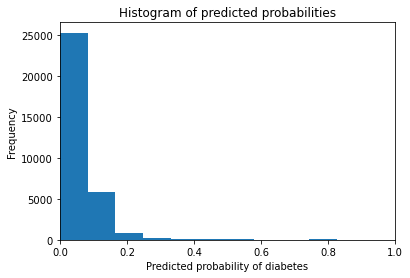

In [82]:
# store the predicted probabilities for class 1
y_pred_prob = lr.predict_proba(X_test_std)[:, 1]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=12)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [93]:
threshold = 0.3

# 初始化；
models = [lr, tree, rf, knn]
preds_new = []

# 对所有的模型进行循环： 注意：这里面svm 模型跑起来有问题，原因不明，我暂时去掉了
for model in models:
    # 获取预测概率
    pred_pro = model.predict_proba(X_test_std)[:, 1]
    # 应用阈值来获取新的预测值
    new_pred = np.where(pred_pro > threshold, 1, 0)
    preds_new.append(new_pred)

[pred_lr_new, pred_tree_new, pred_rf_new, pred_knn_new] = preds_new
print(preds_new)

[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])]


In [99]:
print ('new results for Logistic Regression')
lr_cm_new = confusion_matrix(y_test, preds_new[0])
print (lr_cm_new)
matrix_print(lr_cm_new,y_test,preds_new[0])


new results for Logistic Regression
[[30205   219]
 [ 1945   226]]
TP: 226
TN: 30205
FP: 219
FN: 1945
Classification Accuracy
0.9336094493020402
0.9336094493020402
Classification Error
0.06639055069795981
0.06639055069795985
Recall
0.1040994933210502
0.1040994933210502
Specificity
0.9928017354719958
False Positive Rate
0.007198264528004207
0.007198264528004206
precision
0.5078651685393258
0.5078651685393258
F1 score
0.172782874617737
0.172782874617737


In [100]:
print ('new results for Decision Tree')
tree_cm_new = confusion_matrix(y_test, preds_new[1])
print (tree_cm_new)
matrix_print(tree_cm_new,y_test,preds_new[1])



new results for Decision Tree
[[28534  1890]
 [ 1565   606]]
TP: 606
TN: 28534
FP: 1890
FN: 1565
Classification Accuracy
0.8940021475686455
0.8940021475686455
Classification Error
0.1059978524313545
0.10599785243135451
Recall
0.27913403961308153
0.27913403961308153
Specificity
0.9378779910596897
False Positive Rate
0.06212200894031028
0.06212200894031028
precision
0.24278846153846154
0.24278846153846154
F1 score
0.2596957360188558
0.2596957360188558


In [101]:
print ('new results for Random forests')
rf_cm_new = confusion_matrix(y_test, preds_new[2])
print (rf_cm_new)
matrix_print(rf_cm_new,y_test,preds_new[2])



new results for Random forests
[[29223  1201]
 [ 1313   858]]
TP: 858
TN: 29223
FP: 1201
FN: 1313
Classification Accuracy
0.9228716060745513
0.9228716060745513
Classification Error
0.0771283939254487
0.07712839392544868
Recall
0.39520958083832336
0.39520958083832336
Specificity
0.9605245858532737
False Positive Rate
0.03947541414672627
0.039475414146726284
precision
0.4167071393880524
0.4167071393880524
F1 score
0.40567375886524826
0.40567375886524826


In [102]:
print ('new results for KNN')
knn_cm_new = confusion_matrix(y_test, preds_new[3])
print (knn_cm_new)
matrix_print(knn_cm_new,y_test,preds_new[3])



new results for KNN
[[29403  1021]
 [ 1614   557]]
TP: 557
TN: 29403
FP: 1021
FN: 1614
Classification Accuracy
0.919159380273048
0.919159380273048
Classification Error
0.08084061972695199
0.080840619726952
Recall
0.25656379548595115
0.25656379548595115
Specificity
0.9664409676571128
False Positive Rate
0.03355903234288719
0.03355903234288715
precision
0.35297845373891
0.35297845373891
F1 score
0.2971459055748199
0.2971459055748199
